<a href="https://colab.research.google.com/github/quinn-saleik/Health-Factors-in-Metro-Areas/blob/main/Health_Risks_and_Demographics_across_US_Metro_Areas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import statements and database link


In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pyplot import figure
import plotly.express as pltexp

In [ ]:
big_cities = pd.read_csv('/content/drive/MyDrive/BigCitiesHealth.csv')

<ipython-input-2-a3004e74aad8>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  big_cities = pd.read_csv('/content/drive/MyDrive/BigCitiesHealth.csv')


# Dataframe selection


In [ ]:
segregation_df = big_cities[big_cities['metric_item_label'] == 'Racial Segregation, White and Non-White']
new_df = segregation_df[['geo_label_citystate', 'date_label', 'value']]
new_df = new_df.rename(columns={'value': 'segregation_index'})

df1 = pd.merge(big_cities, new_df[['geo_label_citystate', 'segregation_index','date_label']], how="inner", left_on=['geo_label_citystate', 'date_label'], right_on=['geo_label_citystate', 'date_label']);

In [ ]:
segregation_df = big_cities[big_cities['metric_item_label'] == 'Racial Segregation, White and Black']
new_df = segregation_df[['geo_label_citystate', 'date_label', 'value']]
new_df = new_df.rename(columns={'value': 'white_black_segregation_index'})

df1 = pd.merge(df1, new_df[['geo_label_citystate', 'white_black_segregation_index','date_label']], how="inner", left_on=['geo_label_citystate', 'date_label'], right_on=['geo_label_citystate', 'date_label']);

In [ ]:
segregation_df = big_cities[big_cities['metric_item_label'] == 'Racial Segregation, White and Hispanic']
new_df = segregation_df[['geo_label_citystate', 'date_label', 'value']]
new_df = new_df.rename(columns={'value': 'white_hispanic_segregation_index'})

df1 = pd.merge(df1, new_df[['geo_label_citystate', 'white_hispanic_segregation_index','date_label']], how="inner", left_on=['geo_label_citystate', 'date_label'], right_on=['geo_label_citystate', 'date_label']);

In [ ]:
segregation_df = big_cities[big_cities['metric_item_label'] == 'Racial Segregation, White and Asian']
new_df = segregation_df[['geo_label_citystate', 'date_label', 'value']]
new_df = new_df.rename(columns={'value': 'white_asian_segregation_index'})

df1 = pd.merge(df1, new_df[['geo_label_citystate', 'white_asian_segregation_index','date_label']], how="inner", left_on=['geo_label_citystate', 'date_label'], right_on=['geo_label_citystate', 'date_label']);

In [ ]:
density_df = big_cities[big_cities['metric_item_label'] == 'Population Density']
df2 = density_df[['geo_label_citystate', 'date_label', 'value']]
df2 = df2.rename(columns={'value': 'population_density_measure'})

df_final = pd.merge(df1, df2[['geo_label_citystate', 'population_density_measure','date_label']], how="inner", left_on=['geo_label_citystate', 'date_label'], right_on=['geo_label_citystate', 'date_label']);

In [ ]:
df_final.head()

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label,segregation_index,white_black_segregation_index,white_hispanic_segregation_index,white_asian_segregation_index,population_density_measure
0,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Jose,CA,"San Jose, CA",...,Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Female,White Female,41.787007,40.994276,47.917153,47.951688,5821.732773
1,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Jose,CA,"San Jose, CA",...,Lower pop. density (<10k per sq mi),Less Segregated (<50%),Asian/PI,Both,NaN,41.787007,40.994276,47.917153,47.951688,5821.732773
2,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Jose,CA,"San Jose, CA",...,Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Both,NaN,41.787007,40.994276,47.917153,47.951688,5821.732773
3,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Jose,CA,"San Jose, CA",...,Lower pop. density (<10k per sq mi),Less Segregated (<50%),Black,Both,NaN,41.787007,40.994276,47.917153,47.951688,5821.732773
4,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Jose,CA,"San Jose, CA",...,Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Both,NaN,41.787007,40.994276,47.917153,47.951688,5821.732773


# Coefficient bar graphs through loops: categories, subcategories, and specific items



In [ ]:
columns = ['metric_item_label', 'metric_subcat_label', 'metric_cat_label', 'metric_item_label_subtitle', 'geo_label_city', 'geo_label_state', 'value', 'date_label', 'strata_sex_label', 'strata_race_label', 'segregation_index', 'white_black_segregation_index', 'white_hispanic_segregation_index', 'white_asian_segregation_index', 'population_density_measure']
df = df_final[columns]

In [ ]:
list_of_categories = df['metric_cat_label'].unique()
list_of_subcategories = df['metric_subcat_label'].unique()
specifics = df['metric_item_label'].unique()

In [ ]:
dummy_variables = pd.get_dummies(df['strata_race_label'])
dummy2_variables = pd.get_dummies(df['strata_sex_label'])
df = pd.concat([df, dummy_variables], axis = 1)
df = pd.concat([df, dummy2_variables], axis = 1)
df = df.dropna()

Chronic Health Conditions R^2: 
0.13445507407057355
Life Expectancy and Deaths R^2: 
0.11733811553664486
Access to Health Services R^2: 
0.15460634968647857
Maternal and Child Health R^2: 
0.12120179164055833
Mental Health and Substance Use R^2: 
0.12197365862465859


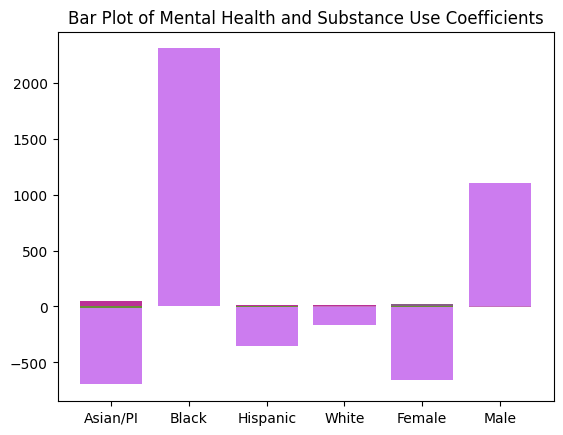

In [ ]:
predictors = ['Asian/PI',	'Black',	'Hispanic',	'White', 'Female', 'Male']
outcome = ['value']

asian_pi_category_table = []
black_category_table = []
hispanic_category_table = []
white_category_table = []
female_category_table = []
male_category_table = []

empty_array = np.zeros(len(list_of_categories))
for i, val in enumerate(list_of_categories):
  df_loop = df[df['metric_cat_label'] == val]
  training_all_lin, testing_all_lin = train_test_split(df_loop, test_size=0.2, random_state=42)
  model = LinearRegression()
  model.fit(training_all_lin[predictors], training_all_lin[outcome])
  color = np.random.rand(3,)
  r = model.score(testing_all_lin[predictors], testing_all_lin[outcome])
  if(r > 0.10):
    plt.bar(predictors, model.coef_[0], color = color)
    plt.title(f'Bar Plot of {val} Coefficients')
    #plt.show()
    print(f'{val} R^2: ')
    print(r)
    asian_pi_category_table.append([val, model.coef_[0][0], r])
    black_category_table.append([val, model.coef_[0][1], r])
    hispanic_category_table.append([val, model.coef_[0][2], r])
    white_category_table.append([val, model.coef_[0][3], r])
    female_category_table.append([val, model.coef_[0][4], r])
    male_category_table.append([val, model.coef_[0][5], r])

Diabetes and Obesity R^2: 
0.5210373051316124
Life Expectancy at Birth R^2: 
0.6393651842226109
Health Insurance R^2: 
0.15736545677376035
Disability R^2: 
0.12770308805784203
Cardiovascular Disease R^2: 
0.5494579001014064
Substance Use R^2: 
0.15817139182916085
Mental Health R^2: 
0.19384458749129263
Crime Incidents R^2: 
0.20922146794817342
Education R^2: 
0.3962406006447049
Respiratory Disease R^2: 
0.37190530494768104
Dietary Quality R^2: 
0.1860773455860426
Birth Control R^2: 
0.13045593210013073


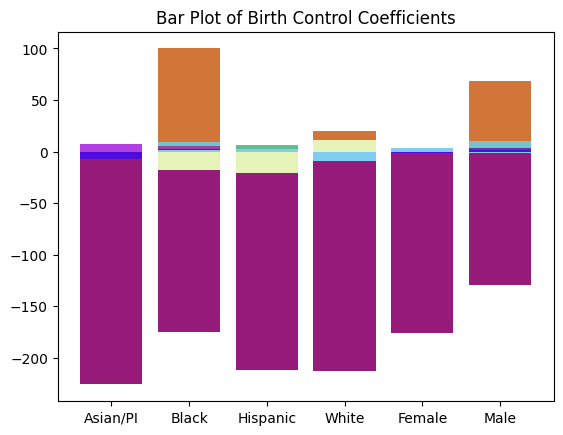

In [ ]:
predictors = ['Asian/PI',	'Black',	'Hispanic',	'White', 'Female', 'Male']
outcome = ['value']

asian_pi_subcategory_table = []
black_subcategory_table = []
hispanic_subcategory_table = []
white_subcategory_table = []
female_subcategory_table = []
male_subcategory_table = []

empty_array = np.zeros(len(list_of_subcategories))
for i, val in enumerate(list_of_subcategories):
  df_loop = df[df['metric_subcat_label'] == val]
  training_all_lin, testing_all_lin = train_test_split(df_loop, test_size=0.2, random_state=42)
  model = LinearRegression()
  model.fit(training_all_lin[predictors], training_all_lin[outcome])
  color = np.random.rand(3,)
  r = model.score(testing_all_lin[predictors], testing_all_lin[outcome])
  if(r > 0.10):
    plt.bar(predictors, model.coef_[0], color = color)
    plt.title(f'Bar Plot of {val} Coefficients')
    #plt.show()
    print(f'{val} R^2: ')
    print(r)
    asian_pi_subcategory_table.append([val, model.coef_[0][0], r])
    black_subcategory_table.append([val, model.coef_[0][1], r])
    hispanic_subcategory_table.append([val, model.coef_[0][2], r])
    white_subcategory_table.append([val, model.coef_[0][3], r])
    female_subcategory_table.append([val, model.coef_[0][4], r])
    male_subcategory_table.append([val, model.coef_[0][5], r])

In [ ]:
predictors = ['Asian/PI',	'Black',	'Hispanic',	'White', 'Female', 'Male']
outcome = ['value']

asian_pi_item_table = []
black_item_table = []
hispanic_item_table = []
white_item_table = []
female_item_table = []
male_item_table = []

empty_array = np.zeros(len(specifics))
for i, val in enumerate(specifics):
  df_loop = df[df['metric_item_label'] == val]
  training_all_lin, testing_all_lin = train_test_split(df_loop, test_size=0.2, random_state=42)
  model = LinearRegression()
  model.fit(training_all_lin[predictors], training_all_lin[outcome])
  color = np.random.rand(3,)
  r = model.score(testing_all_lin[predictors], testing_all_lin[outcome])
  if(r > 0.65):
   # plt.bar(predictors, model.coef_[0], color = color)
   # plt.title(f'Bar Plot of {val} Coefficients')
   # plt.show()
   # print('R^Value:', r)
    print(f'{val} R^2: ')
    print(r)
    asian_pi_item_table.append([val, model.coef_[0][0], r])
    black_item_table.append([val, model.coef_[0][1], r])
    hispanic_item_table.append([val, model.coef_[0][2], r])
    white_item_table.append([val, model.coef_[0][3], r])
    female_item_table.append([val, model.coef_[0][4], r])
    male_item_table.append([val, model.coef_[0][5], r])

Deaths from All Causes R^2: 
0.6681929569107707
All Cancer Deaths R^2: 
0.6741824809252235
Cardiovascular Disease Deaths R^2: 
0.7051262328273287
Heart Disease Deaths R^2: 
0.6852063041203301
Prostate Cancer Deaths R^2: 
0.6998864488128798


# Calculating Demographic Risk


In [ ]:
def category_risk(sex, race, city):
  condition_city = df['geo_label_city'] == city
  condition_sex = df['strata_sex_label'] == sex
  condition_race = df['strata_race_label'] == race
  cats_df = pd.DataFrame(columns=['category', 'risk value'])
  for i, category in enumerate(list_of_categories):
    condition_category = df['metric_cat_label'] == category
    conditioned_df = df[condition_city & condition_race & condition_sex & condition_category]
    value = conditioned_df['value'].mean()
    average_df = df[condition_category]
    average_value = average_df['value'].mean()
    risk_value = (value - average_value) / average_value
    if(np.isnan(risk_value) == False):
      cats_df.loc[i] = [category, risk_value]
  colors = plt.cm.viridis(np.linspace(0, 1, len(list_of_categories)))
  cats_df = cats_df.sort_values(by=['risk value'], ascending = False)
  plt.bar(cats_df['category'], cats_df['risk value'], color = colors)
  plt.xticks(rotation=50)
  plt.xticks(ha='right', va='top')
  string = "Category Risks for " + race + " " + sex + "s in " + city
  plt.title(string)
  plt.show()

In [ ]:
def subcategory_risk(sex, race, city):
  condition_city = df['geo_label_city'] == city
  condition_sex = df['strata_sex_label'] == sex
  condition_race = df['strata_race_label'] == race
  subs_df = pd.DataFrame(columns=['category', 'risk value'])
  for i, category in enumerate(list_of_subcategories):
    condition_category = df['metric_subcat_label'] == category
    conditioned_df = df[condition_city & condition_race & condition_sex & condition_category]
    value = conditioned_df['value'].mean()
    average_df = df[condition_category]
    average_value = average_df['value'].mean()
    risk_value = (value - average_value) / average_value
    if(np.isnan(risk_value) == False):
      subs_df.loc[i] = [category, risk_value]
  subs_df = subs_df.sort_values(by=['risk value'], ascending = False)
  high_risk = subs_df[0:5]
  low_risk = subs_df[-5:]
  plt.bar(high_risk['category'], high_risk['risk value'], label = 'Highest Risk', color = 'red')
  plt.bar(low_risk['category'], low_risk['risk value'], label = 'Lowest Risk', color = 'blue')
  plt.legend()
  plt.xticks(rotation=50)
  plt.xticks(ha='right', va='top')
  string = "Subcategory Risks for " + race + " " + sex + "s in " + city
  plt.title(string)
  plt.show()

In [ ]:
def specific_risk(sex, race, city):
  condition_city = df['geo_label_city'] == city
  condition_sex = df['strata_sex_label'] == sex
  condition_race = df['strata_race_label'] == race
  specifics_df = pd.DataFrame(columns=['category', 'risk value'])
  for i, category in enumerate(specifics):
    condition_category = df['metric_item_label'] == category
    conditioned_df = df[condition_city & condition_race & condition_sex & condition_category]
    value = conditioned_df['value'].mean()
    average_df = df[condition_category]
    average_value = average_df['value'].mean()
    risk_value = (value - average_value) / average_value
    if(np.isnan(risk_value) == False):
      specifics_df.loc[i] = [category, risk_value]
  specifics_df = specifics_df.sort_values(by=['risk value'], ascending = False)
  high_risk = specifics_df[0:5]
  low_risk = specifics_df[-5:]
  plt.figure(figsize = (6, 4))
  plt.tight_layout()
  plt.bar(high_risk['category'], high_risk['risk value'], label = 'Highest Risk', color = 'skyblue')
  plt.bar(low_risk['category'], low_risk['risk value'], label = 'Lowest Risk', color = 'blue')
  plt.legend()
  plt.xticks(rotation=50)
  plt.xticks(ha='right', va='top')
  string = "Specific Risks for " + race + " " + sex + "s in " + city
  plt.title(string)
  plt.savefig('specific_risk_example.svg')
  plt.show()

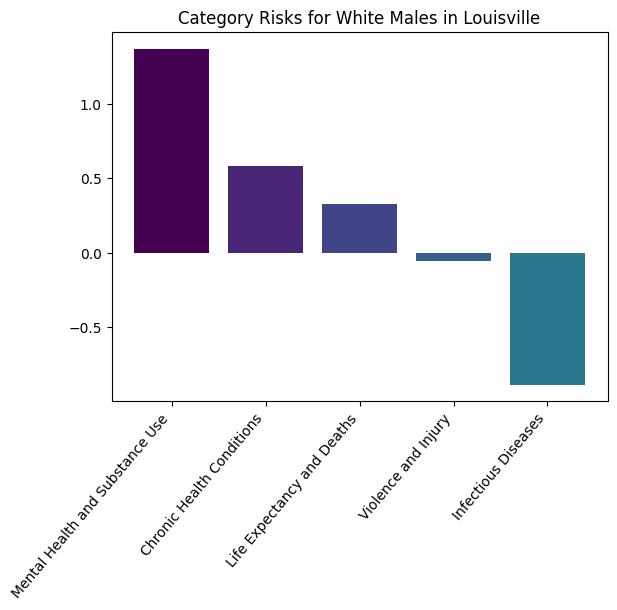

In [ ]:
category_risk('Male', 'White', 'Louisville')

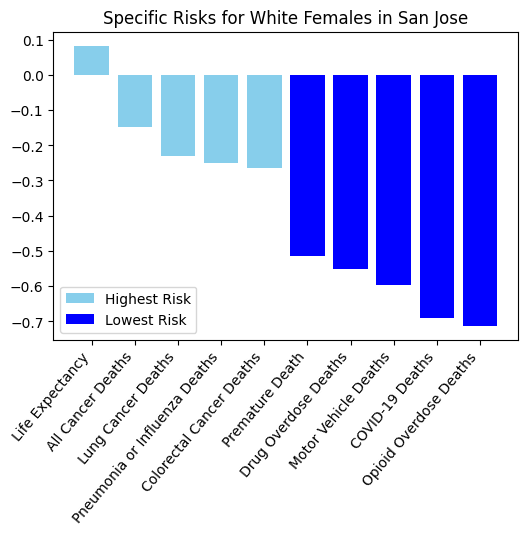

In [ ]:
specific_risk("Female", "White", "San Jose")

In [ ]:
df['date_label'].unique()

array([2020, 2021, 2010, 2011, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012])

In [ ]:
city_list = df['geo_label_city'].unique()
city_list

array(['San Jose', 'San Francisco', 'San Diego', 'Oakland', 'Los Angeles',
       'Long Beach', 'Tucson', 'Phoenix', 'Las Vegas', 'Louisville',
       'Milwaukee', 'Seattle', 'San Antonio', 'Houston', 'Fort Worth',
       'Dallas', 'Austin', 'Philadelphia', 'Portland', 'Oklahoma City',
       'Columbus', 'Charlotte', 'New York City', 'Minneapolis', 'Boston',
       'Indianapolis', 'Chicago', 'Washington', 'Denver', 'El Paso',
       'Memphis', 'Cleveland', 'Kansas City', 'Detroit', 'Baltimore'],
      dtype=object)

# Permutation Testing


In [ ]:
list_of_cities = df['geo_label_city'].unique()

In [ ]:
chosen_categories = ['Infectious Diseases', 'Chronic Health Conditions', 'Maternal and Child Health', 'Mental Health and Substance Use', 'Violence and Injury']
chosen_subcategories = ['Respiratory Infection', 'Cancer', 'Cardiovascular Disease', 'Sexually Transmitted Disease', 'Substance Use', 'Mental Health', 'Crime Incidents']

In [ ]:
def one_bootstrap_median(sample_df):
  resample = sample_df.sample(n=len(sample_df), replace = True)
  return np.median(resample['value'])

In [ ]:
def calculate_z_score(data, value):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_score = (value - mean) / std_dev
    return z_score

In [ ]:
def bootstrap_subcat_loop(race, city, subcategory):
  subcategory_df = df[df['metric_subcat_label'] == subcategory]
  subcategory_df = subcategory_df[subcategory_df['strata_sex_label'] == 'Both']
  subcategory_df = subcategory_df[subcategory_df['geo_label_city'] == city]
  race_df = subcategory_df[subcategory_df['strata_race_label'] == race]
  numsim = 100
  bootstrap_medians = np.zeros(numsim)
  for i in range(numsim):
    bootstrap_medians[i] = one_bootstrap_median(race_df)
  z_score = calculate_z_score(subcategory_df[subcategory_df['strata_race_label'] == 'White']['value'], bootstrap_medians.mean())
  return z_score

In [ ]:
def bootstrap_subcat_loop(race, city, subcategory):
  subcategory_df = df[df['metric_subcat_label'] == subcategory]
  subcategory_df = subcategory_df[subcategory_df['strata_sex_label'] == 'Both']
  subcategory_df = subcategory_df[subcategory_df['geo_label_city'] == city]
  race_df = subcategory_df[subcategory_df['strata_race_label'] == race]
  numsim = 100
  bootstrap_medians = np.zeros(numsim)
  for i in range(numsim):
    bootstrap_medians[i] = one_bootstrap_median(race_df)
  z_score = calculate_z_score(subcategory_df[subcategory_df['strata_race_label'] == 'White']['value'], bootstrap_medians.mean())
  return z_score

In [ ]:
def bootstrap_cat_loop(race, city, category):
  category_df = df[df['metric_cat_label'] == category]
  category_df = category_df[category_df['strata_sex_label'] == 'Both']
  category_df = category_df[category_df['geo_label_city'] == city]
  race_df = category_df[category_df['strata_race_label'] == race]
  numsim = 100
  bootstrap_medians = np.zeros(numsim)
  for i in range(numsim):
    bootstrap_medians[i] = one_bootstrap_median(race_df)
  z_score = calculate_z_score(category_df[category_df['strata_race_label'] == 'White']['value'], bootstrap_medians.mean())
  return z_score

In [ ]:
data1 = []
for category in chosen_categories:
  for city in list_of_cities:
    index = df[df['geo_label_city'] == city]['white_black_segregation_index'].mean()
    data1.append([category, city, bootstrap_cat_loop('Black', city, category), index])
black_z_scores_df = pd.DataFrame(data1, columns = ['category', 'city', 'z_score', 'seg_index'])

In [ ]:
data2 = []
for category in chosen_categories:
  for city in list_of_cities:
    index = df[df['geo_label_city'] == city]['white_hispanic_segregation_index'].mean()
    data2.append([category, city, bootstrap_cat_loop('Hispanic', city, category), index])
hispanic_z_scores_df = pd.DataFrame(data2, columns = ['category', 'city', 'z_score', 'seg_index'])

In [ ]:
data3 = []
for category in chosen_categories:
  for city in list_of_cities:
    index = df[df['geo_label_city'] == city]['white_asian_segregation_index'].mean()
    data3.append([category, city, bootstrap_cat_loop('Asian/PI', city, category), index])
asian_z_scores_df = pd.DataFrame(data3, columns = ['category', 'city', 'z_score', 'seg_index'])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
  category_df = df[df['metric_subcat_label'] == 'Cardiovascular Disease']
  category_df = category_df[category_df['strata_sex_label'] == 'Both']
  category_df = category_df[category_df['strata_race_label'] != 'All']
  race_df = category_df[category_df['strata_race_label'] == 'White']

# Permutation Histogram Example


In [ ]:
numsim = 1000
bootstrap_medians = np.zeros(numsim)
for i in range(numsim):
  bootstrap_medians[i] = one_bootstrap_median(category_df)

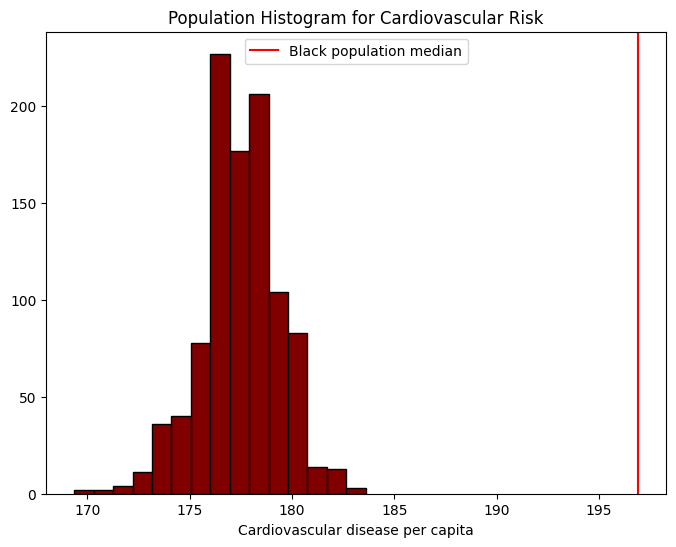

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(bootstrap_medians, bins = 15, edgecolor = 'black', color = 'maroon')
plt.axvline(race_df['value'].median(), color = 'red', label = 'Black population median')
plt.title("Population Histogram for Cardiovascular Risk")
plt.xlabel("Cardiovascular disease per capita")
plt.legend()
plt.savefig('bootstrapping_histogram.svg')

In [ ]:
black_z_scores_df['Race'] = 'Black'
hispanic_z_scores_df['Race'] = 'Hispanic'
asian_z_scores_df.dropna()
asian_z_scores_df['Race'] = 'Asian/PI'

#3D Graph

In [ ]:
new_df = pd.concat([black_z_scores_df, hispanic_z_scores_df, asian_z_scores_df]).dropna()

In [ ]:
fig = px.scatter_3d(new_df, x='z_score', y='seg_index', z='category',
              color='Race')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.update_layout(scene=dict(
    xaxis_title='Risk Score',
    yaxis_title='Segregation Index',
    zaxis_title=' '
))
fig.show()

# Map

In [ ]:
city_state_df = pd.merge(new_df, df[['geo_label_state', 'geo_label_city']], how="left", left_on=['city'], right_on=['geo_label_city'])

In [ ]:
states_csv = pd.read_csv('/content/drive/MyDrive/states.csv')

In [ ]:
state_abbrev_df = pd.merge(city_state_df, states_csv[['State', 'Abbreviation']], how="left", left_on=['geo_label_state'], right_on=['Abbreviation'])

In [ ]:
city_df = pd.read_csv('/content/drive/MyDrive/worldcities.csv')

In [ ]:
lat_long_df = pd.merge(state_abbrev_df, city_df[['lat', 'lng', 'city', 'admin_name']], how="left", left_on=['city', 'State'], right_on=['city', 'admin_name'])

In [ ]:
columns = ['category', 'city', 'State', 'z_score', 'seg_index', 'Race', 'lat', 'lng']
lat_long_df_final = lat_long_df[columns].drop_duplicates()

In [ ]:
#3 races, 5 categories, 34 cities = 3*5*34 = 510 elements
lat_long_df_final.head()

,category,city,State,z_score,seg_index,Race,lat,lng
0,Infectious Diseases,San Jose,California,-0.691006,41.743462,Black,37.3012,-121.8480
4608,Infectious Diseases,San Francisco,California,-0.547414,54.167517,Black,37.7558,-122.4449
10099,Infectious Diseases,San Diego,California,-0.554155,56.078489,Black,32.8313,-117.1222
15708,Infectious Diseases,Oakland,California,-0.555227,49.798928,Black,37.7904,-122.2166
20756,Infectious Diseases,Los Angeles,California,-0.534455,66.572265,Black,34.1141,-118.4068


In [ ]:
def create_map(race, category):
  df_use1 = lat_long_df_final[lat_long_df_final['category'] == category]
  df_use = df_use1[df_use1['Race'] == race]
  fig = px.scatter_mapbox(df_use,
  lat="lat", lon="lng",
  color = "z_score", size= "seg_index",
  hover_name="city", hover_data=["z_score", 'Race'],
  color_continuous_scale=px.colors.cyclical.IceFire,
  mapbox_style="open-street-map",
  zoom=3,
  height=500,
  width=800)
  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  fig.show()


# Interactive Space

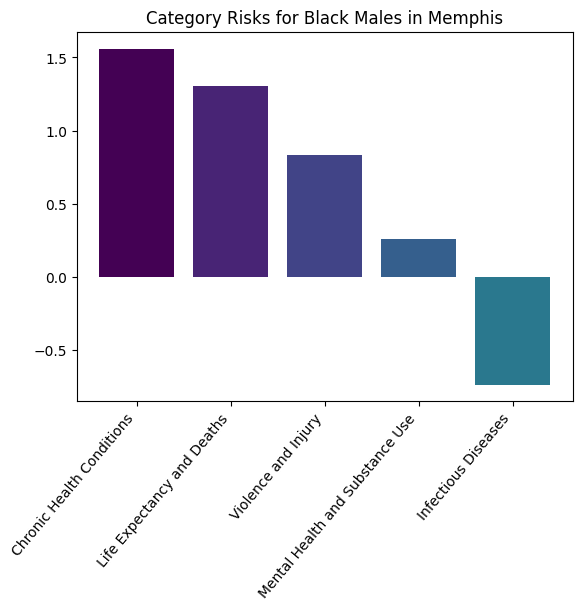

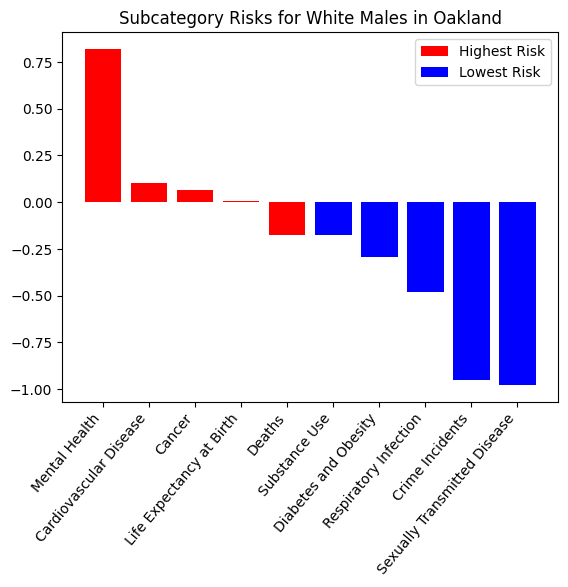

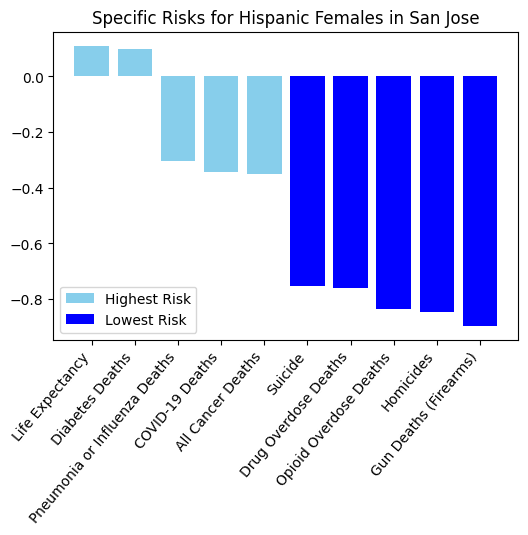

In [ ]:
category_risk('Male', 'Black', 'Memphis')
subcategory_risk('Male', 'White', 'Oakland')
specific_risk('Female', 'Hispanic', 'San Jose')

In [ ]:
chosen_categories

['Infectious Diseases',
 'Chronic Health Conditions',
 'Maternal and Child Health',
 'Mental Health and Substance Use',
 'Violence and Injury']

In [ ]:
create_map('Asian/PI', 'Infectious Diseases')

In [ ]:
create_map('Black', 'Chronic Health Conditions')